In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
df= pd.read_csv('Real_fake_news.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [3]:
df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
author             object
statement          object
source             object
target               bool
BinaryTarget       object
BinaryNumTarget     int64
dtype: object

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4870.0,1217.5,702.996251,0.0,609.0,1217.5,1826.0,2435.0
Unnamed: 0.1,4870.0,1217.5,702.996251,0.0,609.0,1217.5,1826.0,2435.0
BinaryNumTarget,4870.0,0.5,0.500051,0.0,0.0,0.5,1.0,1.0


In [5]:
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [6]:
df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [7]:
df['author'].value_counts()

Ciara O'Rourke        669
Tom Kertscher         311
Louis Jacobson        250
Samantha Putterman    242
Jon Greenberg         153
                     ... 
Duncan Agnew            1
Samantha West           1
Philip Jankowski        1
Dave Boucher            1
Isabella Fertel         1
Name: author, Length: 318, dtype: int64

In [8]:
df= df.drop(columns=['Unnamed: 0','Unnamed: 0.1','target','BinaryTarget']) 

In [9]:
df.head()

,author,statement,source,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,1


In [10]:
df.shape

(4870, 4)

In [11]:
df_f=pd.get_dummies(df)
df_f.head()

,BinaryNumTarget,author_Aaron Marshall,author_Aaron Sharockman,author_Adam Thorp,author_Adrianne Uphold,author_Adriel Bettelheim,author_Al Bernardi,author_Alan Gathright,author_Alan Hovorka,author_Alayna Degenhardt,...,source_WrongWayRubio.com,source_Xavier Becerra,source_Yard sign,source_Yes On 62 campaign to abolish California's death penalty,source_YouTube videos,source_YourContent,source_Yvette McGee Brown,source_Zach Wahls,source_Zerlina Maxwell,source_teaparty.org
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x = df_f.drop(columns=['BinaryNumTarget'])
y= df_f['BinaryNumTarget']

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.30, random_state=100)

In [14]:
ct = dtree(
           criterion="gini",
           max_depth=None
         )
_=ct.fit(x_train,y_train)

In [15]:
y_te =  ct.predict(x_test)
np.sum((y_test == y_te))/y_test.size

0.9021218343600274

In [16]:
fi= ct.feature_importances_
fi

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
clf = rfc(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [18]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8973305954825462


In [19]:
knn = kn(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [20]:
y_pred = knn.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
confusion_matrix(y_test, y_pred)

array([[670,  50],
       [133, 608]], dtype=int64)

In [23]:
accuracy_score(y_test, y_pred)

0.8747433264887063

In [24]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.83437111, 0.92401216]),
 array([0.93055556, 0.82051282]),
 array([0.87984242, 0.86919228]),
 array([720, 741], dtype=int64))

In [25]:
precision_score(y_test, y_pred, average='weighted')

0.8798358707228014

In [26]:
f1_score(y_test, y_pred, average='weighted')

0.8744408072228161

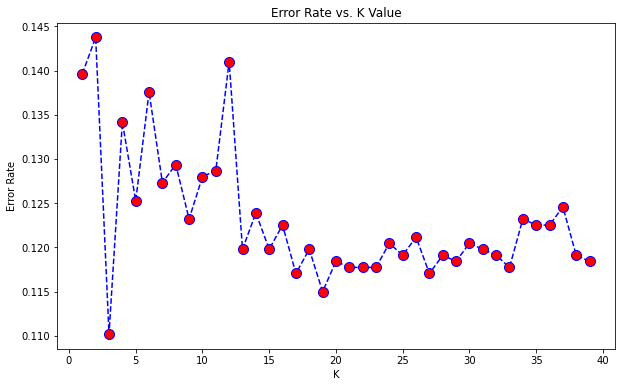

Minimum error:- 0.11019849418206706 at K = 3


In [27]:
error_rate = []
for i in range(1,40):
 knn = kn(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [28]:
knn = kn(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [29]:
y_pred = knn.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred)

0.8898015058179329